# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

2025-05-16 09:43:05.993267: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 09:43:06.023491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-16 09:43:06.023588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-16 09:43:06.024621: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-16 09:43:06.030008: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 09:43:06.030955: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Tasks
In this quest, you will be working on a classic CNN task of classifying cats and dogs images. You can access the training and testing sets [here](https://drive.google.com/drive/folders/19EL9VyYCVqxStG-O1jJtBQGa8JZpLDvO?usp=sharing) and get acquainted with the folder structure.

Make sure to change your Colab runtime to GPU to ensure adequate performance.

Specify 4 directories for cats and dogs images of training and testing sets respectively. You will be using them to build and train the network.

Training Cats Directory: cats
Training Dogs Directory: dogs
Testing Cats Directory: testing_set/cats
Testing Dogs Directory: testing_set/dogs


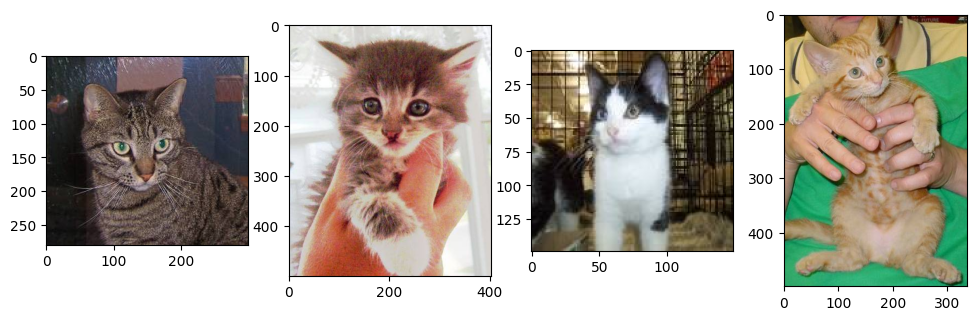

In [2]:
# Specify directories for Cats and Dogs images for training and testing
train_cats_dir = 'cats'
train_dogs_dir = 'dogs'
test_cats_dir = 'testing_set/cats'
test_dogs_dir = 'testing_set/dogs'

# Print the directories to verify
print(f"Training Cats Directory: {train_cats_dir}")
print(f"Training Dogs Directory: {train_dogs_dir}")
print(f"Testing Cats Directory: {test_cats_dir}")
print(f"Testing Dogs Directory: {test_dogs_dir}")


plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(3, 4, i + 1)
    img = plt.imread(os.path.join(train_cats_dir, os.listdir(train_cats_dir)[i]))
    plt.imshow(img)
plt.show()

Création des liens symboliques vers cats et dogs pour les données d'entrainement

In [3]:
import os

# Créer le dossier "train" s'il n'existe pas
os.makedirs('train_set', exist_ok=True)

# Vérifier si les liens symboliques existent déjà avant de les créer
if not os.path.islink('train_set/cats'):
    os.symlink(os.path.abspath('cats'), os.path.abspath('train_set/cats'))

if not os.path.islink('train_set/dogs'):
    os.symlink(os.path.abspath('dogs'), os.path.abspath('train_set/dogs'))


In [4]:
# # Vérifier si les liens symboliques existent déjà
for class_name in ['cats', 'dogs']:
    link_path = os.path.join('train_set', class_name)
    target_path = os.path.abspath(class_name)
    
    if not os.path.exists(link_path):
        os.symlink(target_path, link_path)
    else:
        print(f"Le lien {link_path} existe déjà")

Le lien train_set/cats existe déjà
Le lien train_set/dogs existe déjà


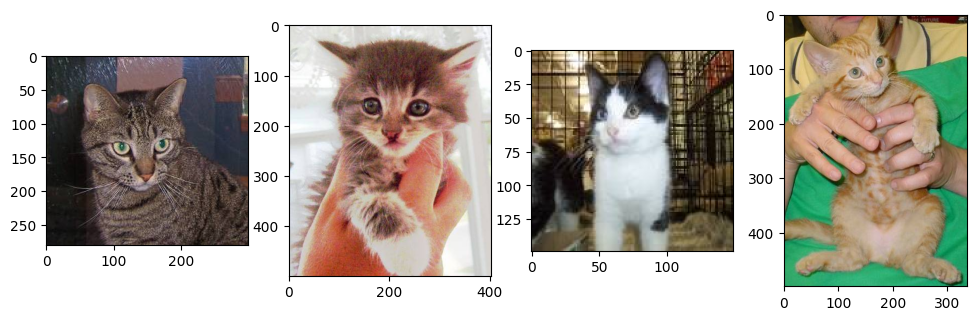

In [5]:
train_cats = 'train_set/cats'
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(3, 4, i + 1)
    img = plt.imread(os.path.join(train_cats, os.listdir(train_cats)[i]))
    plt.imshow(img)
plt.show()

Initiate `ImageDataGenerator` (check the [documentation](https://keras.io/api/preprocessing/image/)). Your image generator needs to convert the image from RGB into number arrays in order for the neural network to proces them (in other words, normalize the values using the `rescale` parameter).

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator with normalization (rescale) before applying it
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

Apply the `ImageDataGenerator` you defined above using `flow_from_directory` to convert both training and testing data.

In [7]:
train_data = train_datagen.flow_from_directory(
    'train_set', # Parent directory for training data
    target_size=(150, 150), # Resize all images to 150x150
    batch_size=32,          # Number of images to process in a batch
    class_mode='binary'     # Classification type: binary since cats and dogs
)

Found 8000 images belonging to 2 classes.


In [8]:
test_data = test_datagen.flow_from_directory(
    'test_set', # Parent directory for testing data
    target_size=(150, 150), # Resize all images to 150x150
    batch_size=32,          # Number of images to process in a batch
    class_mode='binary'     # Classification type: binary
)


Found 1316 images belonging to 2 classes.


Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.

In [9]:
from tensorflow.keras import layers, models

# Build a custom model inspired by VGG16 architecture
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))


# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification


Compile it using the optimizer and error metrics of your choice.

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                   

Fit the model using `fit_generator`. This time, feel free to define the parameters according to your understanding and experiment with them to find a better solution. Be patient though, the training will take a while.

In [11]:
# Fit the model using fit_generator
history = model.fit(
    train_data,                     # Training data generator
    steps_per_epoch=len(train_data),  # Number of steps per epoch (batches per epoch)
    epochs=10,                       # Number of epochs (feel free to experiment)
    validation_data=test_data,       # Validation data generator
    validation_steps=len(test_data)  # Number of validation steps (batches per epoch)
) 

# Save the model for later use
# model.save('cats_and_dogs_vgg16.h5')



Epoch 1/10
250/250 [==============================] - 2509s 10s/step - loss: 0.7007 - accuracy: 0.5005 - val_loss: 0.6930 - val_accuracy: 0.6391
Epoch 2/10
250/250 [==============================] - 2443s 10s/step - loss: 0.6933 - accuracy: 0.4857 - val_loss: 0.6934 - val_accuracy: 0.3609
Epoch 3/10
250/250 [==============================] - 2426s 10s/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.3609
Epoch 4/10
250/250 [==============================] - 2430s 10s/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6920 - val_accuracy: 0.6391
Epoch 5/10
250/250 [==============================] - 2426s 10s/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6926 - val_accuracy: 0.6391
Epoch 6/10
250/250 [==============================] - 2452s 10s/step - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6933 - val_accuracy: 0.3609
Epoch 7/10
250/250 [==============================] - 2458s 10s/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6927 - val_ac

Plot the model accuracy.

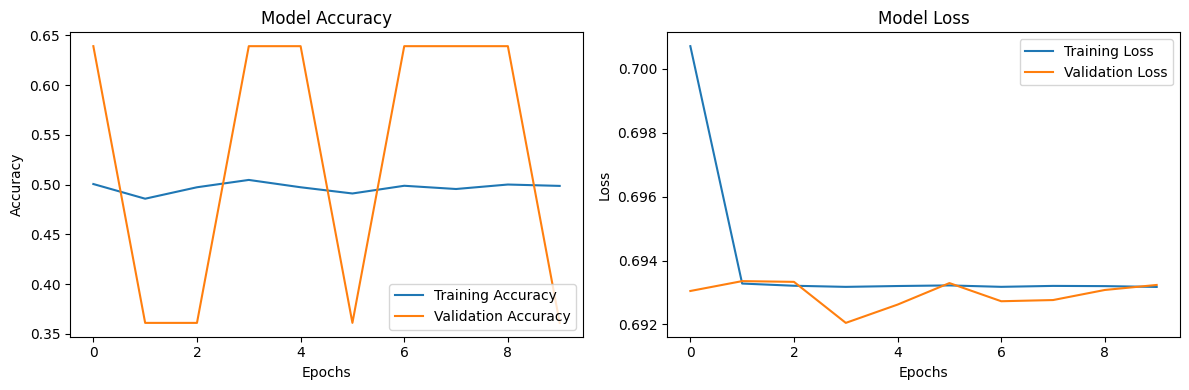

In [12]:
# your code:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()